# Q&A Activity on Data Preprocessing

## Submitted by Group 7

### Contributors :  *Fen Francis Pereira, Jayaram K, Ashmina T.*

**Objective:** Do the following on the dataset  
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing

## 1.Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
#loading the dataset
data = pd.read_csv('employee.csv')

In [3]:
#displaying first 5 rows
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
#getting concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.shape

(9, 7)

There are 9 rows and 7 columns in the dataset.

## 2. Reset the index as "name" as the index.

In [6]:
#setting the column 'name' as index
data.set_index('name',inplace=True)

In [7]:
#displaying the entire dataset
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 3. Select rows for specific names Jack Morgan and Josh wills.

In [8]:
filtered_rows = data.loc[['Jack Morgan','Josh Wills']]
filtered_rows

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


##  4. Select data for multiple values "Sales" and “Finance”.

In [9]:
filtered_rows = data[data['department'].isin(['Finance' , 'Sales'])]
filtered_rows

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5.Display employee who has more than 700 performance score.

In [10]:
filtered_rows = data[data['performance_score']>700]
filtered_rows

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6. Display employee who has more than 500 and less than 700 performance score

In [11]:
filtered_rows = data[(data['performance_score']>500) & (data['performance_score']<700)]
filtered_rows

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7. Check and handle missing values in the dataset.

In [12]:
#checking for missing values
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

There are a total of 6 missing values 2 each in age, income, and gender column.

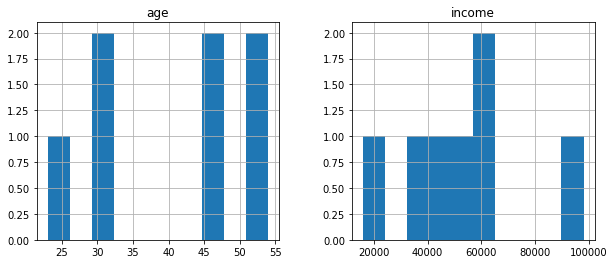

In [13]:
#plotting histograms for age column and income column
freq_graph = data.select_dtypes(include='float')
freq_graph.hist(figsize = (10,4))
plt.show()

In [14]:
#checking statistical summary
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


We can see there are some extreme values, so we will use median value to fill the missing values in age and income columns. As gender is a categorical column, we can use mode for filling missing values.

In [15]:
#filling missing values in age and income columns using median value
for i in ['age','income']:
    data[i].fillna(data[i].median(),inplace=True)

In [16]:
#filling missing values in gender column using mode
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [17]:
#checking for null values
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## 8. Check the outliers and handle outliers in performance score using Percentiles.

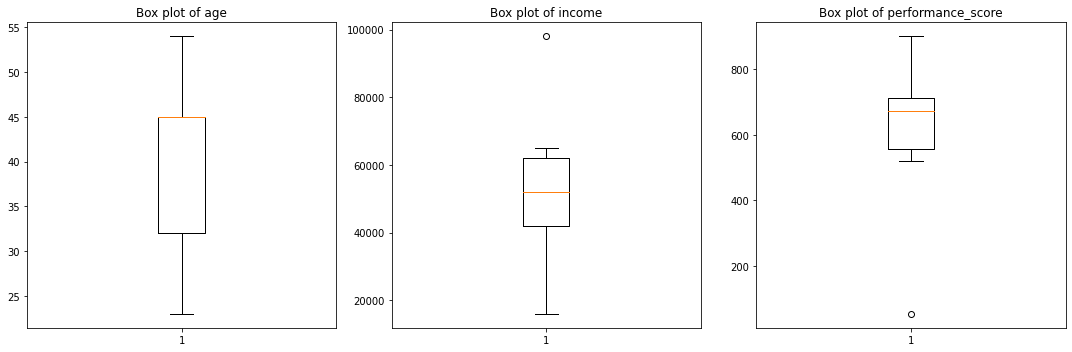

In [18]:
plt.figure(figsize = (15,5))

#boxplot for age column
plt.subplot(1,3,1)
plt.boxplot(data['age'])
plt.title('Box plot of age')

#boxplot for income column
plt.subplot(1,3,2)
plt.boxplot(data['income'])
plt.title('Box plot of income')

#boxplot for performance_score column
plt.subplot(1,3,3)
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')

plt.tight_layout()
plt.show()

There are outliers in income and performance_score columns.

In [19]:
#identifying the outlier in income column and checking whether it needs to be deleted or not
#from the boxplot it is clear that the outlier in the income column is the maximum value in that column
#sorting the data in ascending order based on income value
data[['grade','income','performance_score']].sort_values('income', ascending = False)

,grade,income,performance_score
name,,,
Leo Duck,G4,98000.0,709
Ying Chin,G3,65000.0,556
Satyam Sharma,G3,62000.0,649
Allen Smith,G3,52000.0,723
James Authur,G3,52000.0,53
Josh Wills,G3,52000.0,901
Dheeraj Patel,G2,42000.0,711
Jack Morgan,G2,35000.0,674
S Kumar,G0,16000.0,520


When we consider the data as a whole, we see income is mostly related with grade.  
The maximum value belongs to a grade G4 which is a higer grade, so we can expect a high salary(income) for that perticular grade.  
So, we don't need to consider it as an outlier.

In [20]:
#handling outliers in performance score using Percentiles
#extracting performance_score column
performance = data['performance_score']

#finding quartiles
q1 = np.percentile(performance,25)
q3 = np.percentile(performance,75)

#calculating inter quartile range
IQR = q3-q1

#calculating lower and upper limits
lower = q1-1.5*IQR
upper = q3+1.5*IQR

#removing values outside the limits(outliers)
#identifying the outlier
outlier = []
for x in performance:
    if ((x>upper) or (x<lower)):
        outlier.append(x)
print("Outlier:",outlier)
outlier_indx = data.loc[(data['performance_score']>upper) | (data['performance_score']<lower)].index
print("Index of outlier:",outlier_indx[0])

Outlier: [53]
Index of outlier: James Authur


We have got the outlier as 53. All other performance scores are greater than 500. So, this outlier can be a result of data entry error.
Here we are left with 4 options to handle outlier:
1. We may delete outlier values if it is due to data entry error, but deleting the observation is not good when the dataset is small.  
2. We may impute outlier using mean, median, or zero and there is no loss of data. Here median is appropriate because it is not affected by outliers.  
3. Quantile based flooring and capping.  
4. Another option is treating the outlier separately in the statistical model. So, we treat them in separate groups (with outlier, deleting outlier, impute outlier) and build individual model for both groups and then check the output and find out what is the best way to handle the outlier.  

We  go for option 3.  
The data points that are lesser than lower limit(q1-1.5\*IQR) are replaced with the lower limit value and the data points that are greater than upper limit(q3+1.5\*IQR) are replaced with the upper limit value.

In [21]:
#capping/flooring the outlier at the upper and lower limits
data['performance_score'] = np.where(data['performance_score']>upper,math.floor(upper),
                                     np.where(data['performance_score']<lower,math.ceil(lower),data['performance_score'])).astype(int)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,324
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


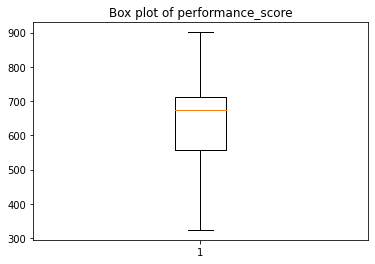

In [22]:
#checking if the outlier is handled successfully or not
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')
plt.show()

## 9. Check the gender column and do Dummy encoding.

In [23]:
#one-hot encoding on gender
data1 = pd.get_dummies(data, columns=['gender'])
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
James Authur,54.0,52000.0,Operations,G3,324,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


## 10. Do the standard scaling on the feature performance score.

Feature scaling is used to standardize the independent features present in the data in a fixed range.  
Standard scaling is one of the feature scaling methods. It re-scales a feature value so that it has distribution with 0 as mean value and 1 as variance.

In [24]:
#creating an instance of standard scaler
standardisation = preprocessing.StandardScaler()

#applying standard scaling on performance_score
data1['performance_score'] = standardisation.fit_transform(data1[['performance_score']])

data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,0.541692,1,0
S Kumar,45.0,16000.0,Finance,G0,-0.795702,1,0
Jack Morgan,32.0,35000.0,Finance,G2,0.218873,0,1
Ying Chin,45.0,65000.0,Sales,G3,-0.558529,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.462634,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,0.054169,1,0
James Authur,54.0,52000.0,Operations,G3,-2.086979,1,0
Josh Wills,54.0,52000.0,Finance,G3,1.714383,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.449458,0,1
